In [56]:
from keras.datasets import imdb
import numpy as np
#import imdb dataset from keras! 
#we will classify the data into positive or negative

In [57]:
#Data preparation
((X_train,Y_train),(X_test,Y_test))=imdb.load_data(num_words=10000)
#num of words in vocab=10000

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [58]:
#print(X_train[0])
#words a mapped to numbers according to the vocab. this is automatically done by keras

In [59]:
#dictionary i.e word to index mapping done by keras
vocab=imdb.get_word_index()
#print(vocab.items())

In [60]:
#to create  a index to number mapping
idx_to_word=dict([[value,key] for (key,value) in vocab.items()])

In [61]:
#print(idx_to_word)

In [62]:
actual_review=' '.join([idx_to_word.get(idx-3,"#") for idx in X_train[0]])
#we took the first example and then took each index from first example and found the word ccorresponding to it and joined them.
#get method gets the value from dictionary when a key is given. if thet key is not found then it will return "#"(we can return anything)
#we did index-3 because keras automatically adds 3 extra words to each sentence

In [63]:
#print(actual_review)

In [64]:
#Now Vectorize the data
#Because each example has to have fixed number of features
# vector size is 10000 as we have 10000 words in vocab
def vectorize_sentences(sentences,dim=10000):
  outputs=np.zeros((len(sentences),dim))
  for i,idx in enumerate(sentences):
    #enumerate returns a tuple i.e one is index of sentence and other is index of word
    outputs[i,idx]= 1
  return outputs

In [65]:
X_train=vectorize_sentences(X_train)

In [66]:
X_test=vectorize_sentences(X_test)

In [67]:
#X_train.shape

In [68]:
Y_train=np.array(Y_train).astype('float32')
Y_test=np.array(Y_test).astype('float32')

In [69]:
#Build A Network
#We will use ReLU as activation fn
# At output Layer we will use Sigmoid as activation fn
# 2 Hidden Layers with 16 units each
from keras import models
from keras.layers import Dense

In [70]:
#define the model
model=models.Sequential()

In [71]:
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [72]:
#compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [73]:
#model.summary()

In [74]:
#Training & Validation
#Our model may overfit on training data but may perform bad on testing data
#So we should stop the training at that point where our test accuracy is maxm(early Stopping)
x_val=X_train[:5000]
#take first 5000 examples for validation set
x_train_new=X_train[5000:]
y_val=Y_train[:5000]
y_train_new=Y_train[5000:]

In [75]:
#train the model
hist=model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/4
40/40 [==============================] - 2s 27ms/step - loss: 0.5473 - accuracy: 0.7343 - val_loss: 0.3284 - val_accuracy: 0.8816
Epoch 2/4
40/40 [==============================] - 1s 19ms/step - loss: 0.2726 - accuracy: 0.9085 - val_loss: 0.3185 - val_accuracy: 0.8698
Epoch 3/4
40/40 [==============================] - 1s 19ms/step - loss: 0.2042 - accuracy: 0.9288 - val_loss: 0.3109 - val_accuracy: 0.8740
Epoch 4/4
40/40 [==============================] - 1s 19ms/step - loss: 0.1608 - accuracy: 0.9468 - val_loss: 0.3102 - val_accuracy: 0.8772


In [76]:
#Visualise The Results
import matplotlib.pyplot as plt
h=hist.history
#it is a dictionary of key as accuracy and list of accuracies, then loss and validation loss as key and their values
#print(h.keys())

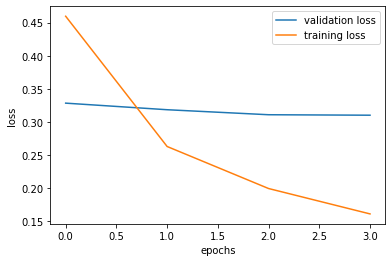

In [77]:
plt.plot(h['val_loss'],label='validation loss')
plt.plot(h['loss'],label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


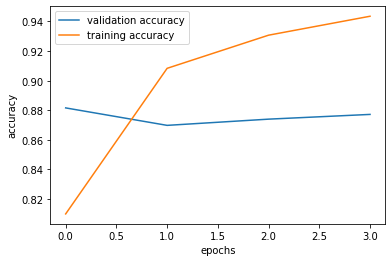

In [78]:
plt.plot(h['val_accuracy'],label='validation accuracy')
plt.plot(h['accuracy'],label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


In [79]:
# we see the val accuracy is now 86%
acc_on_test=model.evaluate(X_test,Y_test)


782/782 [==============================] - 1s 1ms/step - loss: 0.3403 - accuracy: 0.8658


[0.34030038118362427, 0.8658400177955627]

In [80]:
y_pred=model.predict(X_test)

In [87]:
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
#review is positive if Y-pred is 1 else revieew is negative